**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib
import descartes
import seaborn as sns
import re
import csv


**Data exploration**

In [2]:
# Read CSV file
df = pd.read_csv('job analysis.csv', delimiter=';',header = 1)


In [3]:
# Display the first few rows of the dataset
print(df.head())

# Get the dimensions of the dataset (rows, columns)
print(df.shape)

# Get the column names
print(df.columns)

# Get the data types of each column
print(df.dtypes)

# Get summary statistics of numeric columns
print(df.describe())

# Get the missing values of the dataset 
print(df.isnull().sum())

# Get the duplicate values of the dataset 
print(df.duplicated().sum())

                                Job Title                     Location  \
0            Senior Business Data Analyst    Sheikh Zayed, Giza, Egypt   
1                            Data Analyst  6th of October, Giza, Egypt   
2  Repair Order Specialist (Data Analyst)      Nasr City, Cairo, Egypt   
3                     Export Data Analyst       Sheraton, Cairo, Egypt   
4                            Data Analyst     Heliopolis, Cairo, Egypt   

                                        Requierments  \
0  3 to 6 years, Experienced (Non-Manager), Not S...   
1  More than 3 years, Experienced (Non-Manager), ...   
2  1 to 2 years, Entry Level (Junior Level / Fres...   
3  1 to 4 years, Experienced (Non-Manager), Not S...   
4  2 to 4 years, Experienced (Non-Manager), Bache...   

                                              Skills  \
0  Analysis, analytical, Business Analysis, BI, D...   
1  Analysis, analytical, Data Analysis, English, ...   
2  Microsoft PowerPoint, Microsoft Outlook, Micro.

**Data Cleaning and Manipulation**

In [4]:
# Select columns
column_names = ['Company Size', 'Sector']

# Define replacement values for each column
replacement_values = {
    'Company Size': 'None',
    'Sector': 'None'
}

# Replace missing values in the selected columns
df[column_names] = df[column_names].fillna(replacement_values)


In [5]:
# Split the column into columns
df[['Experience','Level', 'Degree', 'Salary']] = df['Requierments'].str.split(',', n=3, expand=True)
df[['Region', 'Size']] = df['Company Size'].str.split('•', n=3, expand=True)



In [6]:
# Drop unnecessary columns
columns_to_drop = ['Requierments','Level','Region','Company Size']
df = df.drop(columns=columns_to_drop)

**Data Analysis**

In [7]:
# Get Top 10 skills
df_exploded = df['Skills'].str.split(',').explode().reset_index(drop=True)
skill = df_exploded.value_counts()
top_10_skills = skill.head(10)
print(top_10_skills)


 Finance                        39
 Analysis                       37
 Financial Analysis             37
 Computer Science               36
 Information Technology (IT)    32
 Software Development           24
 SQL                            22
 English                        22
 Accounting                     20
Accounting                      19
Name: Skills, dtype: int64


In [8]:
df_exploded2 = df['Location']
region = df_exploded2.value_counts()
top_20_region = region.head(20)
top_20_region

Nasr City, Cairo, Egypt                 27
Cairo, Egypt                            23
Maadi, Cairo, Egypt                     16
New Cairo, Cairo, Egypt                 13
Heliopolis, Cairo, Egypt                11
6th of October, Giza, Egypt              9
Mohandessin, Giza, Egypt                 8
Sheikh Zayed, Giza, Egypt                8
Giza, Egypt                              6
Katameya, Cairo, Egypt                   5
Sheraton, Cairo, Egypt                   4
Dokki, Giza, Egypt                       4
Mokattam, Cairo, Egypt                   3
10th of Ramadan City, Sharqia, Egypt     3
Riyadh, Saudi Arabia                     3
Giza, Giza, Egypt                        2
Downtown, Cairo, Egypt                   2
Jeddah, Saudi Arabia                     2
Manial, Cairo, Egypt                     2
San Stefano, Alexandria, Egypt           2
Name: Location, dtype: int64

In [9]:
df_exploded3 = df['Sector']
sector = df_exploded3.value_counts()

# Exclude the specific value 'non'
sector = sector.drop('None')

# Get the top 20 sectors
top_20_sector = sector.head(20)

print(top_20_sector)



Financial Services                                                                   15
Information Technology Services                                                      12
Computer Software, Information Technology Services                                   10
Computer Software                                                                     8
Healthcare and Medical Services                                                       5
Computer and Network Security, Computer Software, Information Technology Services     5
Retail                                                                                5
Higher Education                                                                      4
Construction - Industrial Facilities and Infrastructure                               3
Outsourcing/Offshoring                                                                3
Manufacturing                                                                         3
Human Resources                 

In [10]:
# Turn number of experiences into ranges and give them Labels
def convert_to_range(duration):
    # Remove any non-digit characters and extract numerical values
    years = re.findall(r'\d+', duration)
    
    # Check if any numerical values are extracted
    if years:
        # Convert the years to integers
        years = [int(year) for year in years]
        
        # Determine the range based on the numerical values
        if years[0] <= 3:
            return 'Entry level'
        elif years[0] <= 5:
            return 'Junior'
        else:
            return 'Senior'
    else:
        return duration

# Apply the conversion function to the 'Experience' column
df['Experience_Range'] = df['Experience'].apply(convert_to_range)



In [11]:
df_exploded4 = df['Experience_Range']
range_ = df_exploded4.value_counts()


In [12]:
range_

Entry level      120
Junior            41
Senior            16
Not Specified      2
Name: Experience_Range, dtype: int64

In [13]:
# Define the list of sql values to be replaced
sql = ["Database Design","Database","database administration","MySQL", "Microsoft SQL Server","SQL Server",
       "PostgreSQL","Mysql Database","MSSQL","Query","MS SQL","T-SQL","Mssql"]
replacement1= "SQL"

# Define a function to replace values in a string
def replace_values_in_sql_string(skills):
    # Split the string into individual values
    values1 = skills.split(',')
    
    # Replace the values as needed
    replaced_values1 = [replacement1 if value1.strip() in sql else value1.strip() for value1 in values1]
    
    # Join the replaced values back into a string
    replaced_string1 = ', '.join(replaced_values1)
    
    return replaced_string1

# Apply the function to replace values in each row of the 'Skills' column
df['Skills'] = df['Skills'].apply(replace_values_in_sql_string)



In [14]:
# Define the list of excel values to be replaced
excel = ["excel","Microsoft Excel","MS Excel","Excel","Advanced excel"]
replacement2= "Excel"

# Define a function to replace values in a string
def replace_values_in_excel_string(skills):
    # Split the string into individual values
    values2 = skills.split(',')
    
    # Replace the values as needed
    replaced_values2 = [replacement2 if value2.strip() in excel else value2.strip() for value2 in values2]
    
    # Join the replaced values back into a string
    replaced_string2 = ', '.join(replaced_values2)
    
    return replaced_string2

# Apply the function to replace values in each row of the 'Skills' column
df['Skills'] = df['Skills'].apply(replace_values_in_excel_string)



In [15]:
# Define the list of Power BI values to be replaced
power_bi = ["Microsoft Power BI","BI", "PowerBi","BI Developer"]
replacement3= "Power BI"

# Define a function to replace values in a string
def replace_values_in_power_bi_string(skills):
    # Split the string into individual values
    values3 = skills.split(',')
    
    # Replace the values as needed
    replaced_values3 = [replacement3 if value3.strip() in power_bi else value3.strip() for value3 in values3]
    
    # Join the replaced values back into a string
    replaced_string3 = ', '.join(replaced_values3)
    
    return replaced_string3

# Apply the function to replace values in each row of the 'Skills' column
df['Skills'] = df['Skills'].apply(replace_values_in_power_bi_string)

In [16]:
# Define the list of Python values to be replaced
python= ["Python Scripting"]
replacement4= "Python"

# Define a function to replace values in a string
def replace_values_in_python_string(skills):
    # Split the string into individual values
    values4 = skills.split(',')
    
    # Replace the values as needed
    replaced_values4 = [replacement4 if value4.strip() in python else value4.strip() for value4 in values4]
    
    # Join the replaced values back into a string
    replaced_string4 = ', '.join(replaced_values4)
    
    return replaced_string4

# Apply the function to replace values in each row of the 'Skills' column
df['Skills'] = df['Skills'].apply(replace_values_in_python_string)

**Data Visualization**

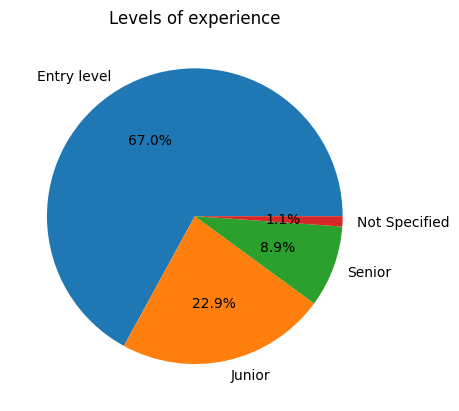

In [17]:
# Create a pie chart
plt.pie(range_, labels=range_.index, autopct='%1.1f%%')

# Add a title
plt.title('Levels of experience')

# Display the chart
plt.show()



In [18]:
# Split the skills into individual entries
df_exploded5 = df['Skills'].str.split(',\s*')

# Create a new DataFrame with exploded skills
df_skills = df_exploded5.explode()

# Count the occurrences of each skill
skill_counts = df_skills.value_counts()

# Print the counts for each skill
for skill, count in skill_counts.items():
    print(skill, count)




Analysis 52
SQL 45
Finance 43
Computer Science 43
Financial Analysis 40
Accounting 39
Information Technology (IT) 39
Excel 28
Software Development 24
Data Analysis 23
English 23
Engineering 17
Power BI 16
business 16
analytical 15
Data 15
Business Analysis 15
Communication 14
accountant 13
JavaScript 13
Analyst 13
Financial 12
HTML 12
ERP 11
Communication skills 11
Financial Management 11
Python 11
Auditing 10
Microsoft Office 10
Oracle 10
Research 10
Software 9
Cost Accounting 9
CSS 9
Business Administration 8
Accounting Software 8
Cost 8
Management 8
Agile 8
Angular 8
Software Engineering 8
Programming 7
Computer Engineering 7
Commerce 7
Cost Accountant 7
Quality Assurance 7
Data Science 7
CPA 7
Marketing 7
Computer Skills 7
jQuery 7
.Net 7
Customer Service 7
Reporting 7
Market Research 6
Planning 6
Tax 6
Development 6
Machine Learning 6
SAP 6
MVC 5
ASP.Net 5
MS Office 5
Economics 5
Credit Analysis 5
Tableau 5
CMA 5
Full Stack 5
Sales 5
Data Analytics 5
ETL 5
Statistics 5
Web Develop

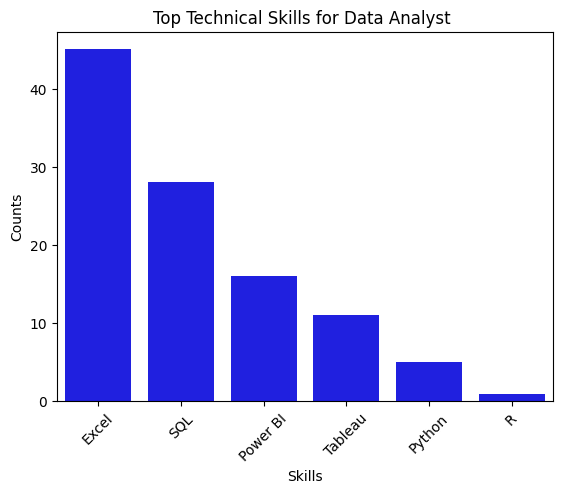

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

required_skills = ["Excel", "SQL", "Power BI", "Tableau", "Python", "R"]
filtered_counts = skill_counts.loc[skill_counts.index.isin(required_skills)]

# Create a bar plot using Seaborn
sns.barplot(x=required_skills,y=filtered_counts,color="blue")

# Set x-axis and y-axis labels
plt.xlabel("Skills")
plt.ylabel("Counts")
plt.title('Top Technical Skills for Data Analyst ')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [20]:
# Display unique values in the 'Experience_Range' column
unique_values = df['Experience_Range'].unique()
print(unique_values)



['Entry level' 'Junior' 'Senior' 'Not Specified']


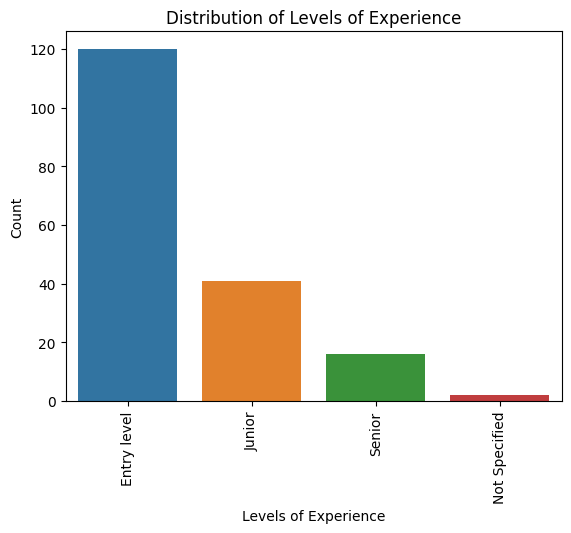

In [21]:
# Create a count plot of the 'Experience_Range' column
sns.countplot(data=df, x='Experience_Range')

# Add labels and title
plt.xlabel('Levels of Experience')
plt.ylabel('Count')
plt.title('Distribution of Levels of Experience')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


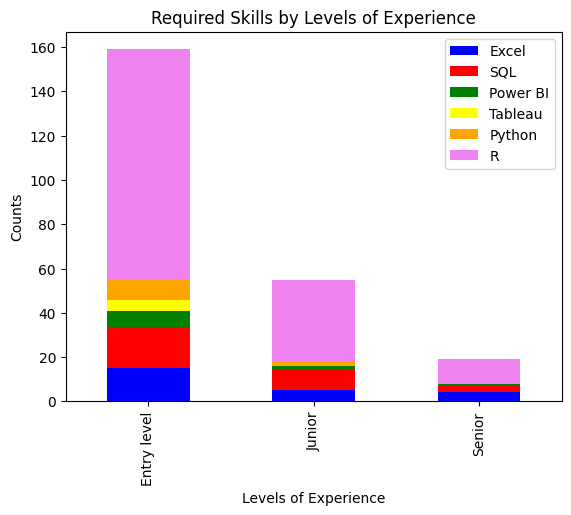

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to store the counts of required skills for each experience range
stacked_df = pd.DataFrame(index=unique_values, columns=required_skills)

# Iterate over each required skill and populate the counts in the DataFrame
for i, skill in enumerate(required_skills):
    counts = df[df['Skills'].str.contains(skill, case=False)]['Experience_Range'].value_counts()
    stacked_df[skill] = counts

# Exclude "Not Specified" from the experience range
stacked_df = stacked_df.loc[stacked_df.index != "Not Specified"]

# Assign colors to required skills
colors = ['blue', 'red', 'green', 'yellow', 'orange','violet']
stacked_df.plot(kind='bar', stacked=True, color=colors[:len(required_skills)])

# Add labels and title
plt.xlabel('Levels of Experience')
plt.ylabel('Counts')
plt.title('Required Skills by Levels of Experience')

# Show the plot
plt.show()


In [23]:
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium

# Geocode addresses to obtain coordinates
geolocator = Nominatim(user_agent='myGeocoder')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['Location_Coordinates'] = df['Location'].apply(geocode).apply(lambda loc: tuple(loc.point) if loc else None)

# Filter out rows with missing coordinates
df = df.dropna(subset=['Location_Coordinates'])

# Create a GeoDataFrame from the coordinates
geometry = gpd.points_from_xy(df['Location_Coordinates'].apply(lambda x: x[1]), df['Location_Coordinates'].apply(lambda x: x[0]))
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Create a map centered around a specific location
center = gdf['geometry'].centroid.iloc[0].coords[0][::-1]  # Get centroid of the data
map = folium.Map(location=center, zoom_start=5, tiles='CartoDB positron')

# Add the address points to the map
for index, row in gdf.iterrows():
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=row['Location'],
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map)

# Display the map
map

